In [1]:
import torch


torch.cuda.is_available()

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

# Latent Space Visualization
It is intended to do something similar to [Visualization and understanding of latent space #12](https://github.com/ChenFengYe/motion-latent-diffusion/issues/12), but for MDM.

We take `./assets/naive_text_prompts.txt` as input, where we have 4 prompts and the repetition is 30.

Since `ClassifierFreeSampleModel` is used, we have both conditioned and unconditioned samples. The `diffusion_steps` is 1000, so we would have 2000 samples for each prompt each repetition. Since the number of samples is too large, we only take the latent vector of step 0, 250, 500, 750, and 999.

Each `.npy` file contains 4 latent vectors (since we have 4 prompts). They all have names like this `latent_vec_<diffusion_step>_<index>`. If the `index` is even, it means the latent vector is conditioned, otherwise it is unconditioned.

For example, `latent_vec_0_0.npy` is the latent vector of the first prompt at step 0, and it is conditioned.

We are going to make this notebook more general, so that we can use it for other inputs.

In [32]:
# !pip install pandas

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


In [15]:
import os
import numpy as np
import pandas as pd


classes = 4
repeitions = 30
prompts = ['A person jumps forward.',
           'A person walks to the right.',
           'A person sits down.',
           'A person climbs up a ladder.']
timesteps = [0, 250, 500, 750, 999]


def load_data(timesteps, repetitions, latent_vec_path='../latent_vec'):
    data_conditioned = []
    data_unconditioned = []
    for i in range(repetitions):
        data_conditioned.append(np.load(os.path.join(latent_vec_path, f'latent_vec_{timesteps}_{2 * i}.npy')))
        data_unconditioned.append(np.load(os.path.join(latent_vec_path, f'latent_vec_{timesteps}_{2 * i + 1}.npy')))
    return np.array(data_conditioned), np.array(data_unconditioned)


In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def preprocess_data(data, repeitions, classes):
    data = data.transpose((0, 2, 1, 3)).reshape((repeitions * classes, -1, 512))
    data = data.reshape((repeitions * classes, -1))
    return data


def draw_tsne(data, labels, colors=['r', 'g', 'b', 'k'], title=''):
    tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
    X_2d = tsne.fit_transform(data)
    for i in range(len(labels)):
        plt.scatter(X_2d[i::len(labels), 0], X_2d[i::len(labels), 1], c=colors[i], label=labels[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()


/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


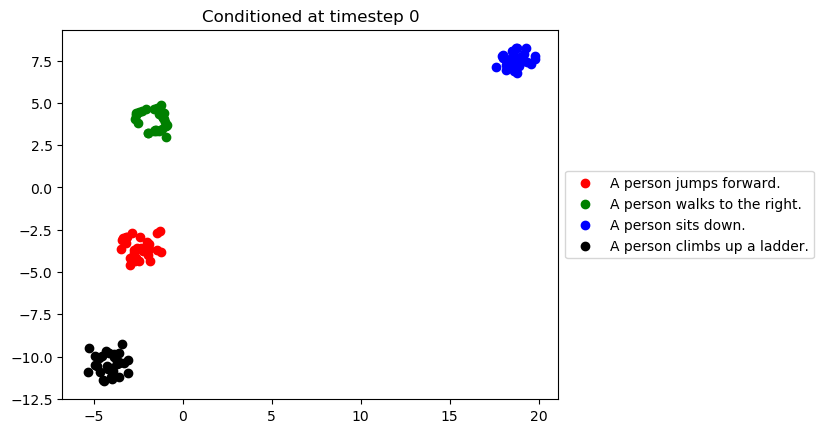

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


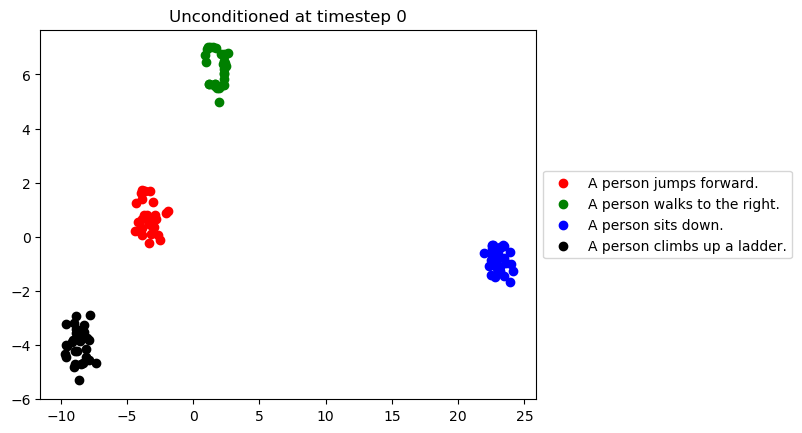

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


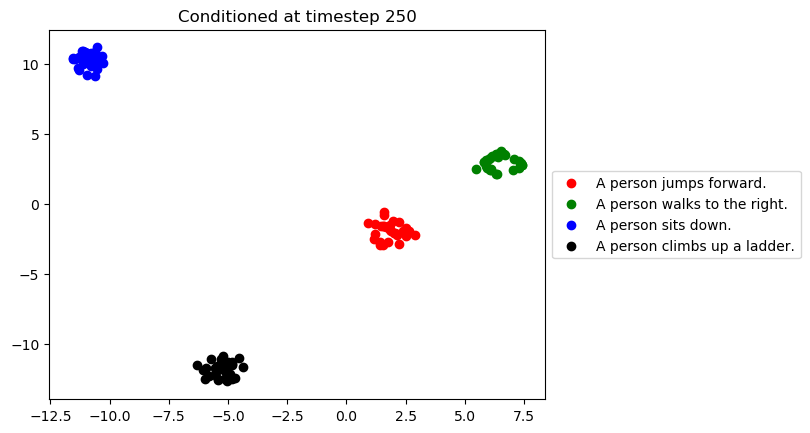

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


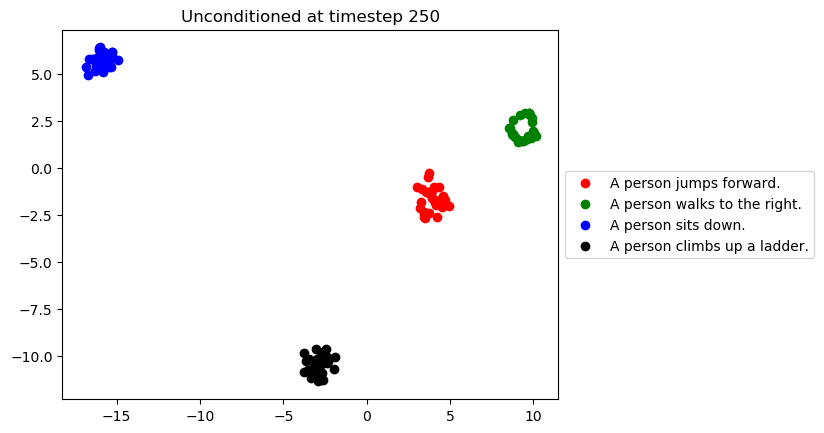

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


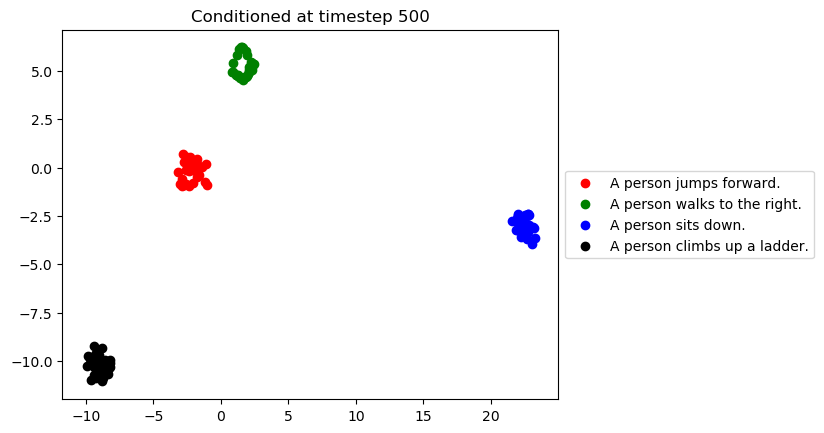

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


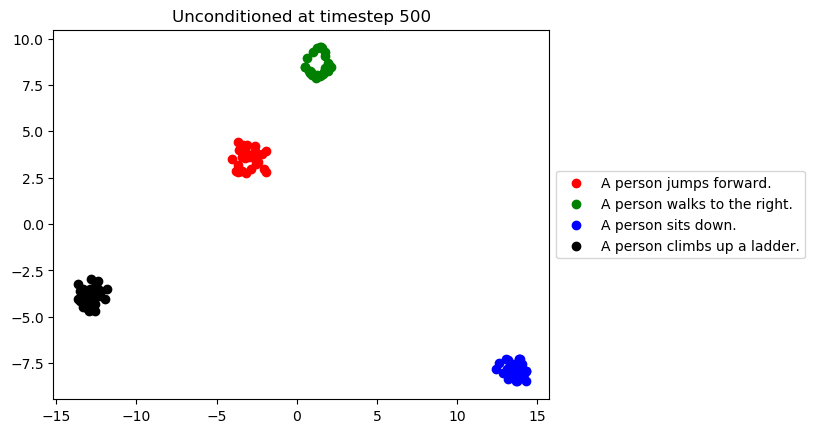

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


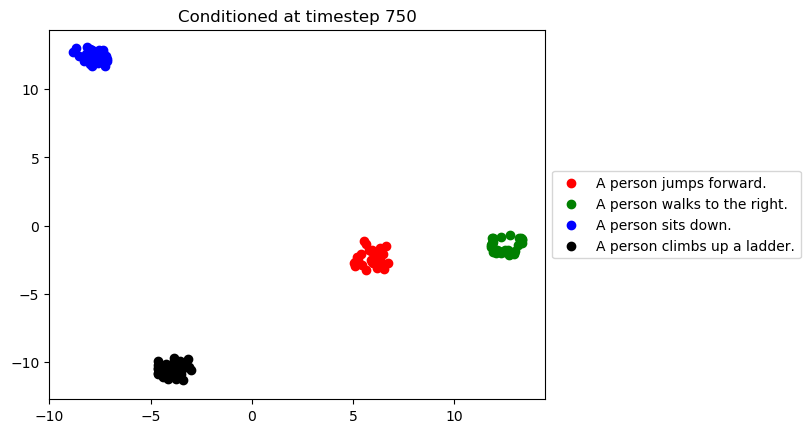

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


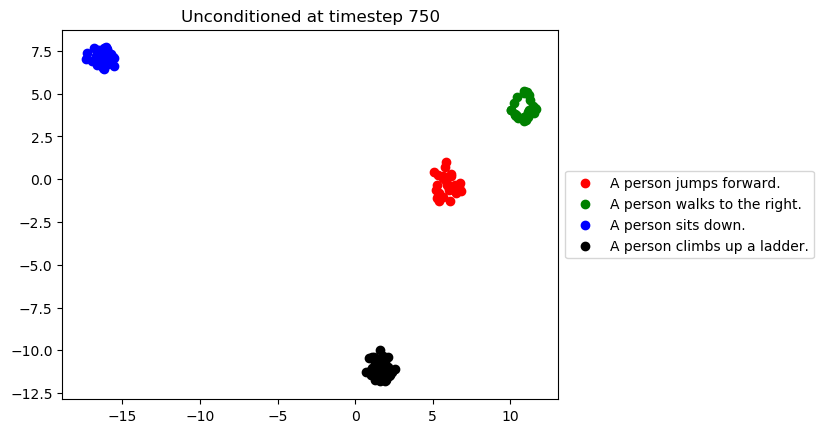

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


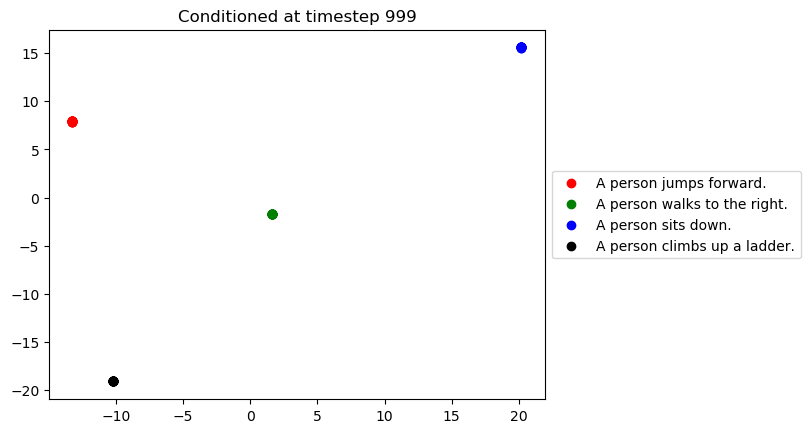

/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ctq566/miniconda3/envs/mdm/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


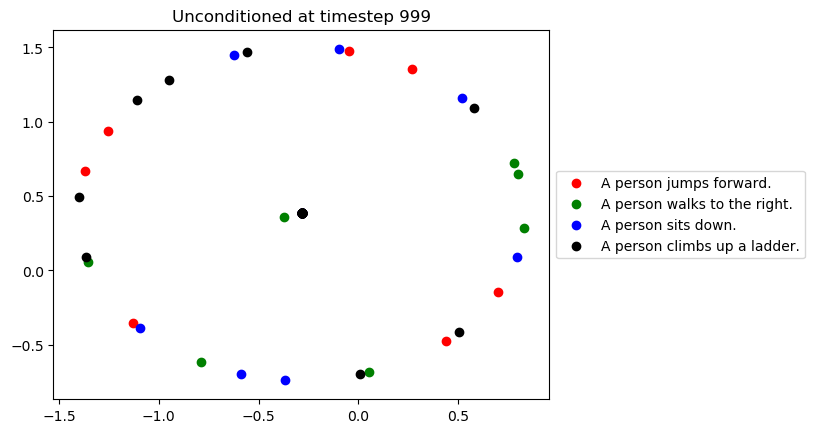

In [16]:
for timestep in timesteps:
    data_conditioned, data_unconditioned = load_data(timestep, repeitions)
    data_conditioned = preprocess_data(data_conditioned, repeitions, classes)
    data_unconditioned = preprocess_data(data_unconditioned, repeitions, classes)
    draw_tsne(data_conditioned, prompts, title=f'Conditioned at timestep {timestep}')
    draw_tsne(data_unconditioned, prompts, title=f'Unconditioned at timestep {timestep}')